In [1]:
#questions to be answered:
# What is the average suggested age for lego sets?

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv(r'C:\Nandini\ml_projects\projects\Natrual language processing\lego sets analysis\archive (7)\lego_sets.csv')

In [3]:
df.head()

,ages,list_price,num_reviews,piece_count,play_star_rating,prod_desc,prod_id,prod_long_desc,review_difficulty,set_name,star_rating,theme_name,val_star_rating,country
0,06-12-2021,29.99,2.0,277,4.0,Catapult into action and take back the eggs fr...,75823,Use the staircase catapult to launch Red into ...,Average,Bird Island Egg Heist,4.5,Angry Birds™,4.0,US
1,06-12-2021,19.99,2.0,168,4.0,Launch a flying attack and rescue the eggs fro...,75822,Pilot Pig has taken off from Bird Island with ...,Easy,Piggy Plane Attack,5.0,Angry Birds™,4.0,US
2,06-12-2021,12.99,11.0,74,4.3,Chase the piggy with lightning-fast Chuck and ...,75821,Pitch speedy bird Chuck against the Piggy Car....,Easy,Piggy Car Escape,4.3,Angry Birds™,4.1,US
3,12+,99.99,23.0,1032,3.6,Explore the architecture of the United States ...,21030,Discover the architectural secrets of the icon...,Average,United States Capitol Building,4.6,Architecture,4.3,US
4,12+,79.99,14.0,744,3.2,Recreate the Solomon R. Guggenheim Museum® wit...,21035,Discover the architectural secrets of Frank Ll...,Challenging,Solomon R. Guggenheim Museum®,4.6,Architecture,4.1,US


In [4]:
df.describe()

,list_price,num_reviews,piece_count,play_star_rating,prod_id,star_rating,val_star_rating
count,12261.000000,10641.000000,12261.000000,10486.000000,1.226100e+04,10641.000000,10466.000000
mean,65.141998,16.826238,493.405921,4.337641,5.983675e+04,4.514134,4.228960
std,91.980429,36.368984,825.364580,0.652051,1.638115e+05,0.518865,0.660282
min,2.272400,1.000000,1.000000,1.000000,6.300000e+02,1.800000,1.000000
25%,19.990000,2.000000,97.000000,4.000000,2.103400e+04,4.300000,4.000000
50%,36.587800,6.000000,216.000000,4.500000,4.206900e+04,4.700000,4.300000
75%,70.192200,13.000000,544.000000,4.800000,7.092200e+04,5.000000,4.700000
max,1104.870000,367.000000,7541.000000,5.000000,2.000431e+06,5.000000,5.000000


In [5]:
dff=df.dropna()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12261 entries, 0 to 12260
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ages               12261 non-null  object 
 1   list_price         12261 non-null  float64
 2   num_reviews        10641 non-null  float64
 3   piece_count        12261 non-null  int64  
 4   play_star_rating   10486 non-null  float64
 5   prod_desc          11884 non-null  object 
 6   prod_id            12261 non-null  int64  
 7   prod_long_desc     12261 non-null  object 
 8   review_difficulty  10206 non-null  object 
 9   set_name           12261 non-null  object 
 10  star_rating        10641 non-null  float64
 11  theme_name         12258 non-null  object 
 12  val_star_rating    10466 non-null  float64
 13  country            12261 non-null  object 
dtypes: float64(5), int64(2), object(7)
memory usage: 1.3+ MB


In [7]:
#data cleaning model
# getting ages from the date
from datetime import datetime, date
k=0
for i in dff["ages"]:
    i=str(i)
    if(len(i)<10):
        p=''
        for j in i:
            if(j.isdigit()):
                p+=j
        
        dff.iloc[k,0]=int(p)
    else:
        born=i
        born = datetime.strptime(born, "%d-%m-%Y").date()
        today = date.today()
        
        dff.iloc[k,0]=today.year - born.year - ((today.month,
                                              today.day) < (born.month,
                                                            born.day))
        if(dff.iloc[k,0]==-1):
            dff.iloc[k,0]=0
    
    k+=1
print(dff['ages'].unique())    

C:\Users\Shailesh Kadre\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


[0 12 10 22 4 16 14 6 7 15 13 9 8 5]


In [8]:

ll=dff.sort_values(["ages"])
dff=dff.sort_values(['ages'])
print(ll["ages"].unique())

[0 4 5 6 7 8 9 10 12 13 14 15 16 22]


In [9]:
ages=list(ll['ages'])
age_ranges = [(0,2), (3,5), (6,9), (10,12), (13,15),(16,)]
aran=list()
for a in ages:
        for r in age_ranges:
                if a >= r[0] and (len(r) == 1 or a <= r[1]):
                    aran.append(r)
                    break
dff["age_range"]=aran

In [10]:
dff.head()

,ages,list_price,num_reviews,piece_count,play_star_rating,prod_desc,prod_id,prod_long_desc,review_difficulty,set_name,star_rating,theme_name,val_star_rating,country,age_range
0,0,29.9900,2.0,277,4.0,Catapult into action and take back the eggs fr...,75823,Use the staircase catapult to launch Red into ...,Average,Bird Island Egg Heist,4.5,Angry Birds™,4.0,US,"(0, 2)"
4513,0,36.5878,8.0,257,4.2,Call the Fire Response Unit for help!,60108,Be part of the crew that helps protect LEGO® C...,Average,Fire Response Unit,3.9,City,3.8,DE,"(0, 2)"
4512,0,36.5878,2.0,347,4.5,Race to the rescue on land and sea!,60165,Join the rough and ready crew of the LEGO® Cit...,Very Easy,4 x 4 Response Unit,5.0,City,5.0,DE,"(0, 2)"
4511,0,36.5878,14.0,294,4.2,Help Chase McCain and the police nab the crook!,60138,Be part of the action with the LEGO® City poli...,Average,High-speed Chase,4.2,City,4.1,DE,"(0, 2)"
4510,0,36.5878,7.0,344,5.0,"Load up the Pickup & Caravan, it’s time for a ...",60182,Head out into nature with the family in the LE...,Easy,Pickup & Caravan,5.0,City,5.0,DE,"(0, 2)"


In [11]:
dff.drop(['prod_id','prod_long_desc','prod_desc'], inplace=True, axis=1)

In [12]:
dff.head()

,ages,list_price,num_reviews,piece_count,play_star_rating,review_difficulty,set_name,star_rating,theme_name,val_star_rating,country,age_range
0,0,29.9900,2.0,277,4.0,Average,Bird Island Egg Heist,4.5,Angry Birds™,4.0,US,"(0, 2)"
4513,0,36.5878,8.0,257,4.2,Average,Fire Response Unit,3.9,City,3.8,DE,"(0, 2)"
4512,0,36.5878,2.0,347,4.5,Very Easy,4 x 4 Response Unit,5.0,City,5.0,DE,"(0, 2)"
4511,0,36.5878,14.0,294,4.2,Average,High-speed Chase,4.2,City,4.1,DE,"(0, 2)"
4510,0,36.5878,7.0,344,5.0,Easy,Pickup & Caravan,5.0,City,5.0,DE,"(0, 2)"


In [ ]:
# What is the average suggested age for lego sets?

In [17]:
df1=dff.groupby(dff['set_name'])

In [30]:
ans1=dict()
for i in df1["ages"]:
    ans1[i[0]]=i[1].mean()

In [147]:
print(df['set_name'].unique())

['Bird Island Egg Heist' 'Piggy Plane Attack' 'Piggy Car Escape'
 'United States Capitol Building' 'Solomon R. Guggenheim Museum®'
 'Shanghai' 'New York City' 'Buckingham Palace' 'London' 'Chicago'
 'Arc de Triomphe' 'The Eiffel Tower' 'Sydney' 'BOOST Creative Toolbox'
 'Go Brick Me' 'Owen & Blue' 'Mr. Incredible & Frozone' 'Chewbacca™'
 'Han Solo™' 'Iron Man MK50' 'Thanos' 'Star-Lord' 'Gamora' 'Finn'
 "Valentine's Bee" 'Wonder Woman™' 'The Flash™' 'Kylo Ren™' 'Rey'
 'Aquaman™' 'Cyborg™' 'Marty McFly & Doc Brown'
 'Tactical Batman™ & Superman™' 'Easter Bunny' 'Lloyd' 'Master Wu'
 'Captain Armando Salazar' 'Captain Phasma™' 'Batman™' 'Iron Man'
 'Captain Jack Sparrow' 'The Hulk' 'Belle' 'Beast' 'The Joker™'
 'Black Widow' 'Robin™' 'Batgirl™' 'Mountain River Heist' 'Cargo Train'
 'High-speed Passenger Train' 'Jungle Air Drop Helicopter'
 'Coast Guard Head Quarters' 'Jungle Exploration Site' 'Police Station'
 'Mining Experts Site' 'Fire Station' 'Mountain Police Headquarters'
 'Cargo Term

In [148]:
print("enter the name of the lego set")
k=input()
print("the avg suggested age is :",ans1[k])

enter the name of the lego set
Iron Man MK50
the avg suggested age is : 10.0


In [ ]:
#age vrs percentage

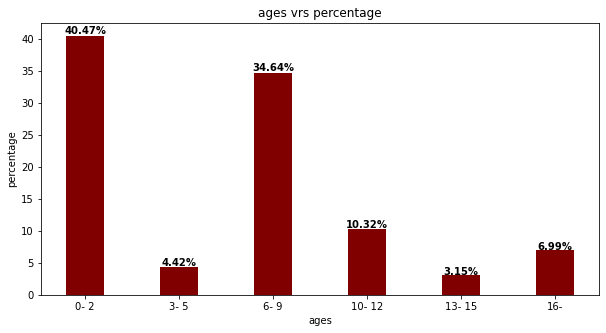

In [84]:
import matplotlib.pyplot as plt
g1=dff.groupby(dff["age_range"]).count().reset_index()
x=list()
for i in g1["age_range"]:
    i=str(i).strip('()').replace(',','-')
    x.append(i)
Y=list()
total=dff.shape[0]
for i in g1["ages"]:
    p=(i/total)*100
    Y.append(round(p,2))
fig = plt.figure(figsize = (10, 5))
 
g1=plt.bar(x, Y, color ='maroon',
        width = 0.4)
 
plt.xlabel("ages")
plt.ylabel("percentage")
plt.title("ages vrs percentage")
i = 0
for p in g1:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(Y[i])+'%',
             ha='center',
             weight='bold')
    i+=1
plt.show()

In [ ]:
#ages vrs price

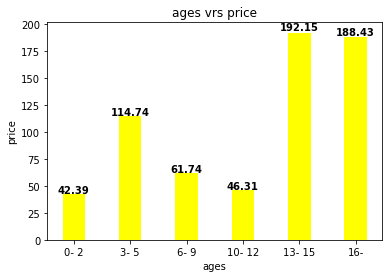

In [110]:
g2=dff.groupby(dff['age_range']).mean(['piece_count','list_price']).reset_index()
X=list()
for i in g2["age_range"]:
    i=str(i).strip('()').replace(',','-')
    X.append(i)
Ypc=list(g2['piece_count'])
Ylp=list(g2['list_price'])
g1=plt.bar(X, Ylp, color ='yellow',
        width = 0.4)
 
plt.xlabel("ages")
plt.ylabel("price")
plt.title("ages vrs price")
i = 0
for p in g1:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(round(Ylp[i],2)),
             ha='center',
             weight='bold')
    i+=1
plt.show()


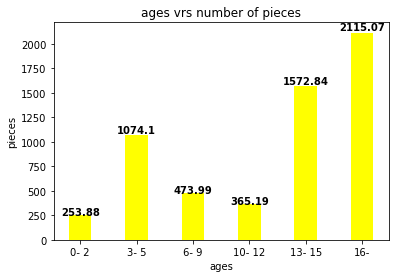

In [112]:
#ages vrs piece count
g1=plt.bar(X, Ypc, color ='yellow',
        width = 0.4)

plt.xlabel("ages")
plt.ylabel("pieces")
plt.title("ages vrs number of pieces")
i = 0
for p in g1:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(round(Ypc[i],2)),
             ha='center',
             weight='bold')
    i+=1
plt.show()

In [ ]:
#relationship between list_price and piece_count

In [113]:
import seaborn as sns
from scipy.stats import norm

<AxesSubplot:>

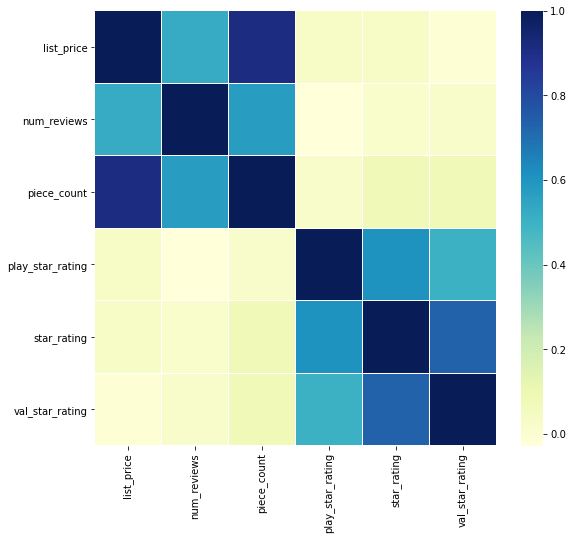

In [114]:
corrmat = dff.corr()
f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)
#concludes they are strongly related